In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [148]:
from PIML.box.boxWR import BoxWR

In [149]:
b = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [119.76694921306375, 109.78704119443798, 114.81953864461816, 111.10672591043294, 94.24599730968626, 80.38896690447244, 73.81106544794034, 42.57875996349618, 21.323447238674145, 9.145118053444794, 5.574880605558665]
Top10 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


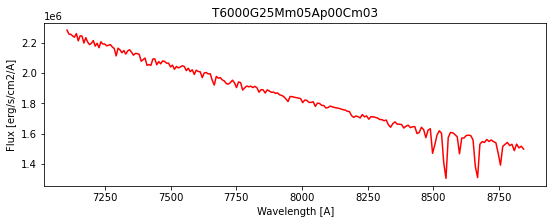

In [150]:
W="RedM"; R="R"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1)

In [151]:
pmt2 = [-5.0e-01,  6.25e+03,  2.5e+00, -2.5e-01,  0.0e+00]
b.test_rbf(b.PhyMid, pmt2)

IndexError: invalid index to scalar variable.

In [9]:
NL, NL2 = 100, 30
b.estimate_snr(NL), b.estimate_snr(NL2)

(9.841683086402195, 28.929958153968037)

noise_level 100


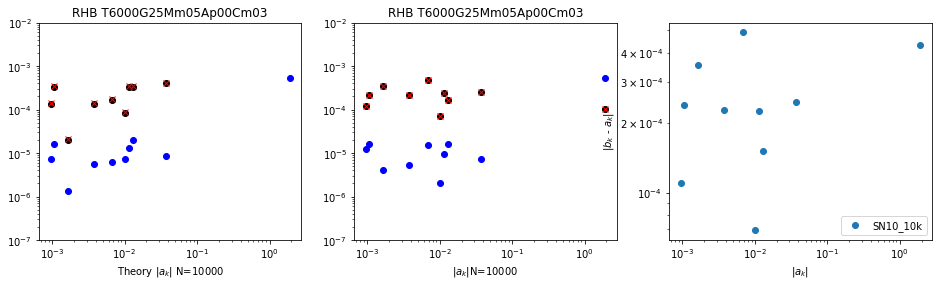

In [11]:
diff_10k_100, bias_10k_100, bias_10k_100X = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL)
b.plot_pca_bias([diff_10k_100], bias_10k_100,bias_10k_100X, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"], N=10000)

In [294]:
diff_10k_100, bias_10k_100, bias_10k_100X = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL)
# diff_10k_30, bias_10k_30, bias_10k_30X = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL2)
# diff_1M_100, bias_1M_100, bias_10k_100X = b.eval_pca_bias(b.PhyMid, 1000000, noise_level=NL)

noise_level 100
noise_level 30
noise_level 100


In [304]:
diffs = [diff_10k_100, diff_10k_30, diff_1M_100]

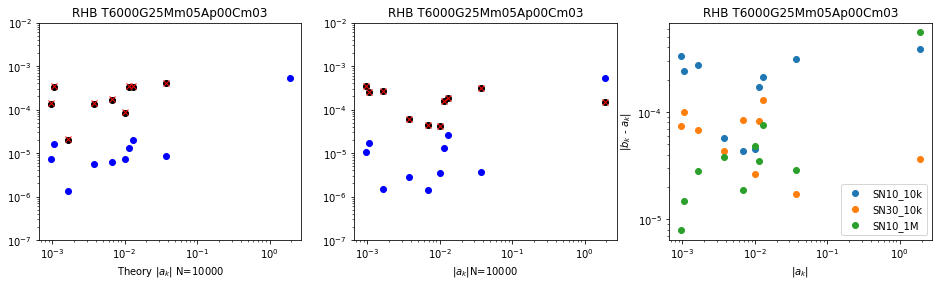

In [305]:
b.plot_bias_evals(diffs, bias_10k_100,biasX= bias_10k_100X, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"], N=10000)

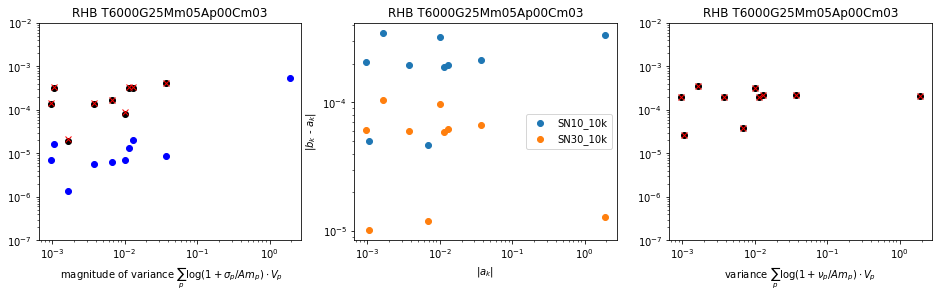

In [240]:
b.plot_bias_evals(diffs, bias_10k_100,biasX= bias_10k_100X, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"])

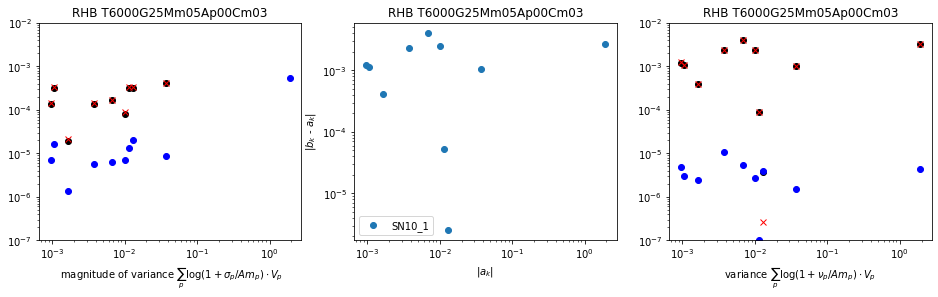

In [241]:
b.plot_bias_evals([diff], bias1,biasX= bias1X, pmt=None, diff_labels=["SN10_1","SN30_10k","SN10_1M"])

In [ ]:
nu = (obsfluxs - b.interp_obs_fn(pmt))
obssig = obsvar **0.5
X = nu / obssig

In [138]:
biass = b.interp_bias_fn(stdmag, X=X)

In [171]:
AModel =  b.interp_obs_fn(pmt, log=0)

In [191]:
stdmag = b.interp_stdmag_fn(pmt, noise_level)


In [301]:
 bias1k, bias1kX

((array([ 0.00020829, -0.00015779,  0.00014338, -0.00016252, -0.00035759,
          0.00016052, -0.0002919 ,  0.00014485,  0.0002116 , -0.00019231]),
  array([ 0.00020837, -0.00015777,  0.00014339, -0.00016248, -0.00035758,
          0.00016048, -0.00029193,  0.00014486,  0.0002116 , -0.00019231]),
  array([ 7.89004536e-08,  2.91606356e-08,  9.51991691e-09,  4.58034430e-08,
          5.22522110e-09, -3.62186116e-08, -2.92237493e-08,  1.24589322e-08,
          2.58164007e-09, -1.64779778e-09])),
 (array([ 0.00020829, -0.00015779,  0.00014338, -0.00016252, -0.00035759,
          0.00016052, -0.0002919 ,  0.00014485,  0.0002116 , -0.00019231]),
  array([ 0.00020837, -0.00015777,  0.00014339, -0.00016248, -0.00035758,
          0.00016048, -0.00029193,  0.00014486,  0.0002116 , -0.00019231]),
  array([ 5.31900720e-04, -2.94286722e-05,  7.22496609e-06,  2.61039595e-06,
         -1.19241504e-06, -2.14671267e-06,  8.01163044e-06,  1.58855024e-05,
          6.19397552e-06,  5.52675837e-06])))

noise_level 100


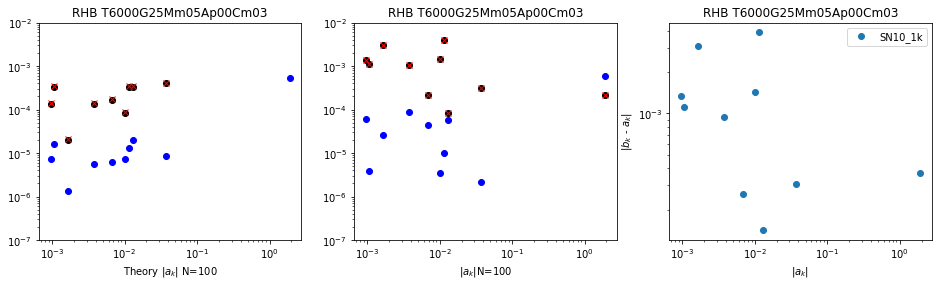

In [310]:
N=100
diff1k, bias1k, bias1kX = b.eval_pca_bias(pmt, N, noise_level=100, snr=None)
b.plot_bias_evals([diff1k], bias1k,biasX= bias1kX, pmt=None, diff_labels=["SN10_1k","SN30_10k","SN10_1M"], N=N)

noise_level 100


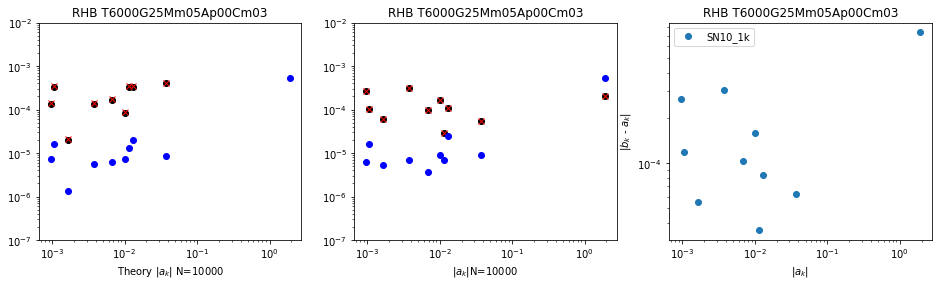

In [316]:
N=10000
diff1k, bias1k, bias1kX = b.eval_pca_bias(pmt, N, noise_level=100, snr=None)
b.plot_bias_evals([diff1k], bias1k,biasX= bias1kX, pmt=None, diff_labels=["SN10_1k","SN30_10k","SN10_1M"], N=N)

noise_level 100


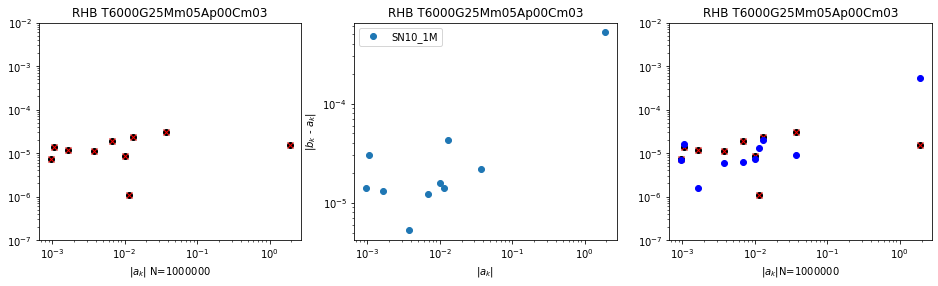

In [272]:
N=1000000
diff1M, bias1M, bias1MX, X1M = b.eval_pca_bias(pmt, N, noise_level=100, snr=None)
b.plot_bias_evals([diff1M], bias1M,biasX= bias1MX, pmt=None, diff_labels=["SN10_1M","SN30_10k","SN10_1M"], N=N)

array([2.20608354e-02, 3.21809748e-04, 4.06772262e-04, 8.19613025e-05,
       1.95410196e-05, 1.36460094e-04, 3.26632682e-04, 3.24538099e-04,
       1.65232667e-04, 1.37377478e-04])

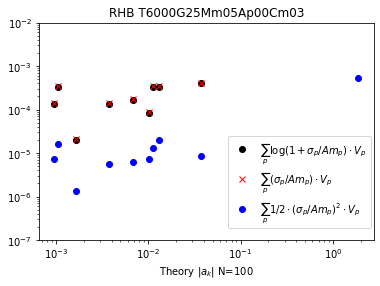

In [318]:
b.plot_theory_bias(ak, bias1k, NL=NL, log=1, theory=1, N=100, lgd=1)

array([2.05739414e-04, 1.08393672e-04, 5.32183136e-05, 1.68496595e-04,
       6.02057993e-05, 3.14577178e-04, 2.90778392e-05, 1.02502030e-04,
       9.97323856e-05, 2.61265365e-04])

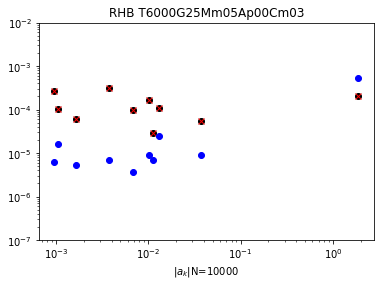

In [317]:
b.plot_theory_bias(ak, bias1kX, NL=NL, log=1, theory=0, N=10000)

array([1.54205716e-05, 2.34346697e-05, 3.07903587e-05, 8.38790796e-06,
       1.15276874e-05, 1.13277389e-05, 1.09047525e-06, 1.36730270e-05,
       1.84836684e-05, 7.11573278e-06])

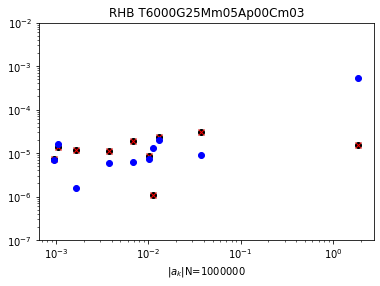

In [312]:
b.plot_theory_bias(ak, bias1MX, NL=NL, log=1, theory=0, N=1000000)

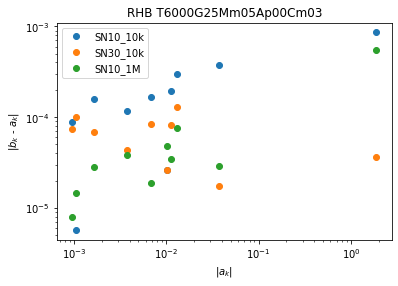

In [300]:
b.plot_exp_bias(ak, diffs, labels=["SN10_10k","SN30_10k","SN10_1M"])

In [324]:
b.minmax_rescaler=b.rescaler

In [491]:
pmts=b.get_random_pmt(10)

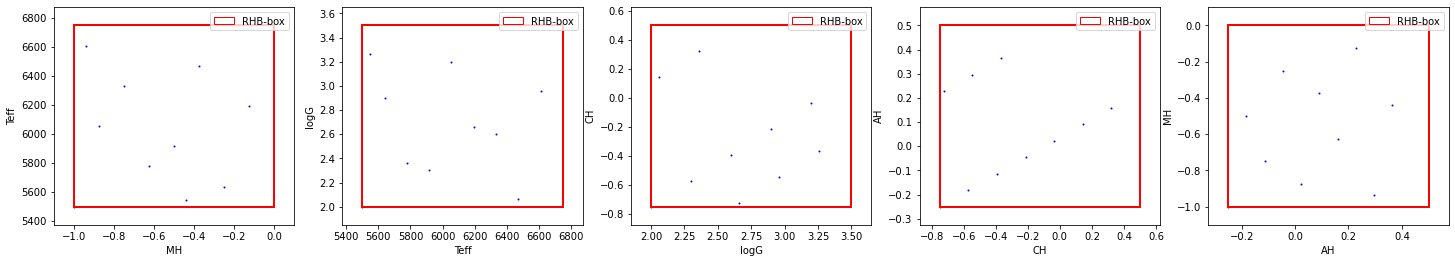

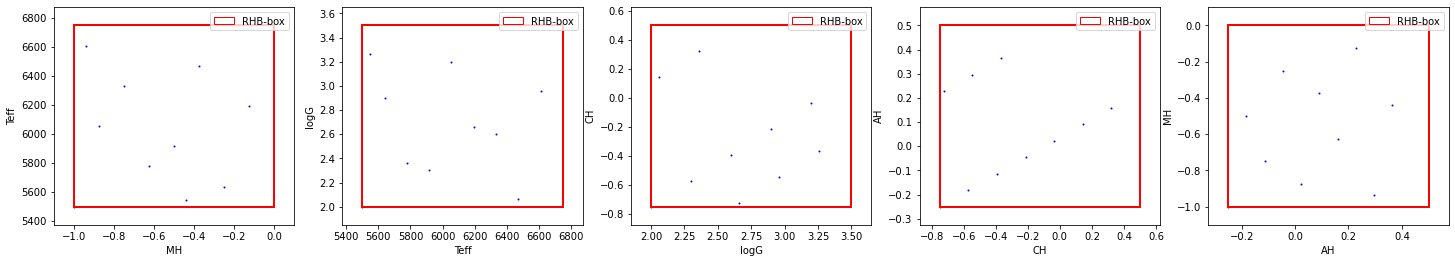

In [492]:
b.PLT.plot_box([0,1,2,3,4], pmts )


In [373]:
NL=100
bk_fns_10k, bks_10k = b.get_bk_fns(NL, pmts = train_pmts, out_bks=1)
bk_fns_1k, bks_1k = b.get_bk_fns(NL, pmts = test_pmts, out_bks=1)

In [469]:
from PIML.nn.dnn.dnnWR import dnnWR

In [470]:
d = dnnWR()

In [471]:
d.init(W,R,nFtr=b.topk, out_idx=[1,2])

In [472]:
train_pmts.shape

(100000, 5)

In [12]:
nTrain, nTest = 100000, 100
train_pmts = b.get_random_pmt(nTrain)
test_pmts = b.get_random_pmt(nTest)

In [152]:
N=10
noise_level=1
tap, tep = train_pmts[:N], test_pmts[:N]
aks_train = b.rbf_ak(tap)
std_train = b.interp_stdmag_fn(tap, noise_level)
aks_test = b.rbf_ak(tep)
std_test = b.interp_stdmag_fn(tep, noise_level)


In [153]:
from PIML.nn.dnn.model.noisednn import NoiseDNN, DataGenerator 

In [156]:
train_DG = DataGenerator(aks_train, std_train, , batch_size=3)

In [157]:
train_DG.__getitem__(1)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [96]:
# test


In [97]:
dnn = NoiseDNN()

In [98]:
dnn.set_model_shape(N,N)
dnn.set_model_param()
dnn.build_model(noise_level=1)

Layers: [10, 64, 32, 16, 10]


In [99]:
dnn.model.summary()

Model: "dnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 10)]              0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [158]:
x

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [2, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [3, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [4, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [5, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [6, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [7, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [8, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [9, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [163]:
np.random.normal(0, np.array([[0,1000], [0, 1000]]), (2,2))

array([[    0.        , -2835.06781501],
       [    0.        ,   774.43498217]])

In [162]:
np.random.normal(0, np.array([[0,1000], [1, 100000]]), (2,2))

array([[ 0.00000000e+00, -1.62846267e+03],
       [ 8.07071189e-01, -5.50318913e+04]])

In [101]:
dnn.fit(x,x,x, batch=2, shuffle=False, ep=1)

cut: 8
X= [[ 0.          1.09748657  4.79268368  3.71018599  2.15436135  3.31039754
  -1.91449615 -0.20060391  7.90197558 -2.13219778]
 [ 3.06972427  2.83602052  2.00088386 -0.30435058  6.84678001  1.37317316
   1.78781807 12.78656812  9.79361998 10.23111938]] y= [[0 1 2 3 4 5 6 7 8 9]
 [1 1 2 3 4 5 6 7 8 9]]
X= [[ 6.          1.98575255 -0.18371774  1.49275451  3.30453765  4.97946195
   0.47287032  6.41831869  3.99287258  5.41311534]
 [ 6.96364627  3.09841346  0.36014602  3.21843221 -3.0292261   7.18751802
  15.61854415  4.81767112 13.87449923 16.39333432]] y= [[6 1 2 3 4 5 6 7 8 9]
 [7 1 2 3 4 5 6 7 8 9]]
X= [[ 4.         -0.12335847  0.73299773  3.72247688  6.82174412  4.14842108
  17.926441    0.28519084 -1.38446006 14.24162473]
 [ 4.11579367  1.94299904  2.12306626  1.72528536  9.43336715  3.59506136
  -5.84813873  0.68098994  0.83999042 -3.97396676]] y= [[4 1 2 3 4 5 6 7 8 9]
 [5 1 2 3 4 5 6 7 8 9]]
X= [[ 0.          2.51349997 -1.28006794  0.92831377  3.04458003  2.88543012
   1

In [88]:
x

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [2, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [3, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [4, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [5, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [6, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [7, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [71]:
dnn.predict(x)

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]], dtype=float32)

In [336]:
dnn.fit(tf.ones((5,8)), tf.ones((5,8)), tf.ones((5,8)),ep=1)

Tensor("noisednn/noise_aug_layer_4/mul:0", shape=(None, 8), dtype=float32)
Tensor("noisednn/noise_aug_layer_4/mul:0", shape=(None, 8), dtype=float32)
Tensor("noisednn/noise_aug_layer_4/mul:0", shape=(None, 8), dtype=float32)
1/1 - 0s - loss: 0.6756 - mean_squared_error: 0.6756 - val_loss: 0.6756 - val_mean_squared_error: 0.6756 - lr: 0.0100 - 218ms/epoch - 218ms/step


In [376]:
d.prepare(bks_10k, train_pmts, bks_1k, test_pmts) 

In [377]:
d.run(lr=0.01, dp=0.0, nEpoch=100, verbose=0)

Layers: [10, 64, 32, 16, 2]
| EP 100 |loss: 0.0063 | mean_: 0.0063 | val_l: 0.0064 | val_m: 0.0064 | lr: 0.0000 | 


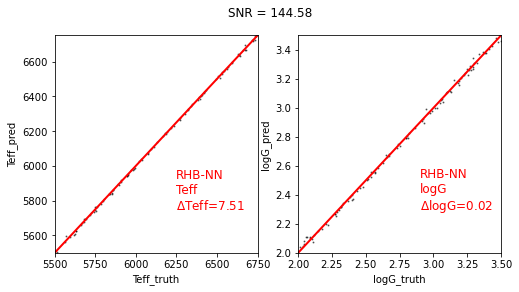

In [370]:
d.eval(snr = b.estimate_snr(NL))

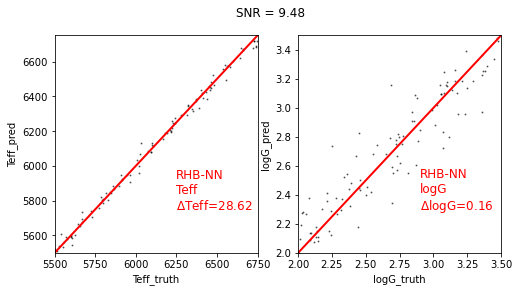

In [378]:
d.eval(snr = b.estimate_snr(NL))

In [ ]:
NL=100
bk_fns_10k, bks_10k = b.get_bk_fns(NL, pmts = train_pmts, out_bks=1)
bk_fns_1k, bks_1k = b.get_bk_fns(NL, pmts = test_pmts, out_bks=1)

In [382]:
bk_N_obs = b.get_bks_N_obs_from_pmt(noise_level=NL, pmt=b.PhyMid, N_obs=100)

In [391]:
b.PhyMid[d.odx]

array([6.0e+03, 2.5e+00])

In [395]:
d.eval_pmt_noise(bk_N_obs, b.PhyMid, 100)

(100, 2)
(100, 2)


TypeError: plot_box() missing 1 required positional argument: 'pdxs'

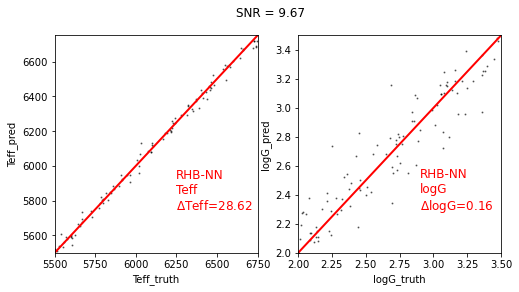

In [409]:
d.init_eval(NL, b.estimate_snr, b.get_bks_N_obs_from_pmt)

100%|██████████| 10/10 [00:01<00:00,  5.81it/s]


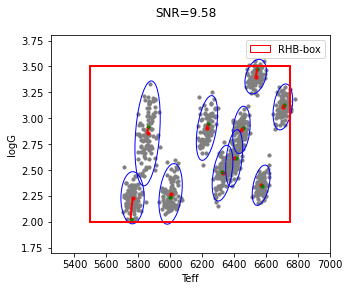

In [424]:
np.random.seed(926)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(pmts, NL, 100, 0.2)

100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


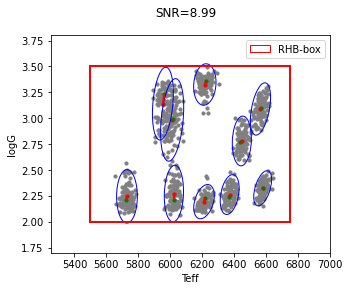

In [419]:
np.random.seed(1015)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(test_pmts[:10], NL, 100, 0.2)

100%|██████████| 10/10 [00:01<00:00,  7.95it/s]


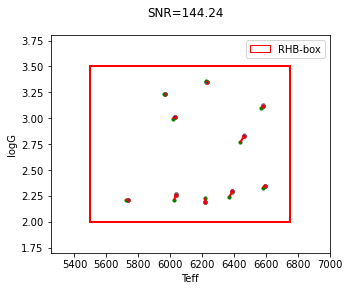

In [418]:
d.eval_pmts_noise(test_pmts[:10], 1, 10, 0.2)

In [407]:
preds

array([[5.93780401e+03, 2.49332368e+00],
       [6.03775650e+03, 2.57310952e+00],
       [5.98682369e+03, 2.56321526e+00],
       [6.05845223e+03, 2.55700625e+00],
       [5.96359144e+03, 2.67684199e+00],
       [5.95436975e+03, 2.30935119e+00],
       [6.02049469e+03, 2.90595248e+00],
       [5.99716830e+03, 2.22376805e+00],
       [6.03746711e+03, 2.37784439e+00],
       [5.99777813e+03, 2.34425741e+00]])

In [ ]:
# d.run(lr=0.01, dp=0.2, nEpoch=100, verbose=0)